Your task is to train machine learning models which can predict, based on the given features, the
strength for a batch of concrete. First, we’ll need to load the provided dataset into a Jupyter Notebook
from the provided CSV file. The names of the columns will correspond to those given above.
Consider at least three features from the dataset and note their distributions, any extraneous/outlying
values you might need to consider, and whether they seem correlated (on cursory look) to the strength.
Then, utilizing only the tools and processes outlined in this course, you’ll train a linear regression on
80% of the dataset (training set) to predict the strength of a concrete batch. Test your model on the
remaining 20% of your data and report the mean square error of your model.
Next, use PCA to reduce the dimensionality of the dataset to two and then train a new model to
predict the strength of concrete using the new resulting dimensions as features. Generate a scatter
plot showing the date points in blue and the decision boundary in black. Test your new model and
report the mean square error. Compare the performance of this new model with the previous one.
Which is more effective, and why?

In [ ]:
pip install ydata-profiling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

# Load CSV into a DataFrame
df = pd.read_csv("./Concrete_Strength.csv", na_values="?")

# Display first 5 rows
df.head()

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30

In [ ]:
profile = ProfileReport(df, title="Concrete strength profiling data frame")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 42.75it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

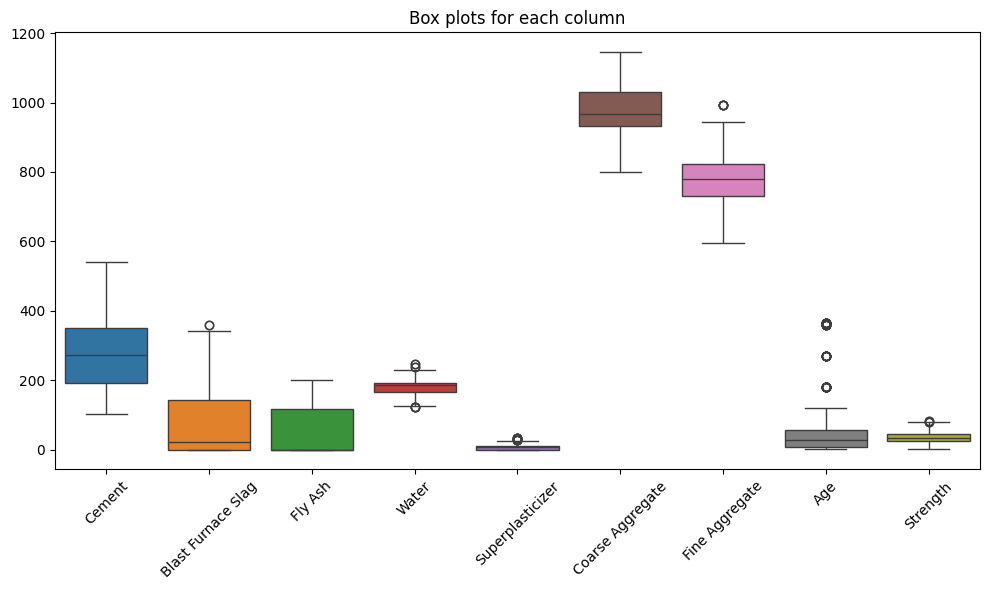

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient='v')  # Use orient='h' for horizontal box plots
plt.title('Box plots for each column')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame and includes the relevant columns
features = ['Water', 'Age', 'Cement']
target = 'Strength'

# 3. Train/test split
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Predictions and MSE
y_pred = model.predict(X_test)
mse_original = mean_squared_error(y_test, y_pred)

print(f"\nMean Squared Error on test set: {mse:.4f}")
rmse = np.sqrt(mse_original)
print(f"RMSE: {rmse:.2f}")


Mean Squared Error on test set: 128.7528
RMSE: 11.35


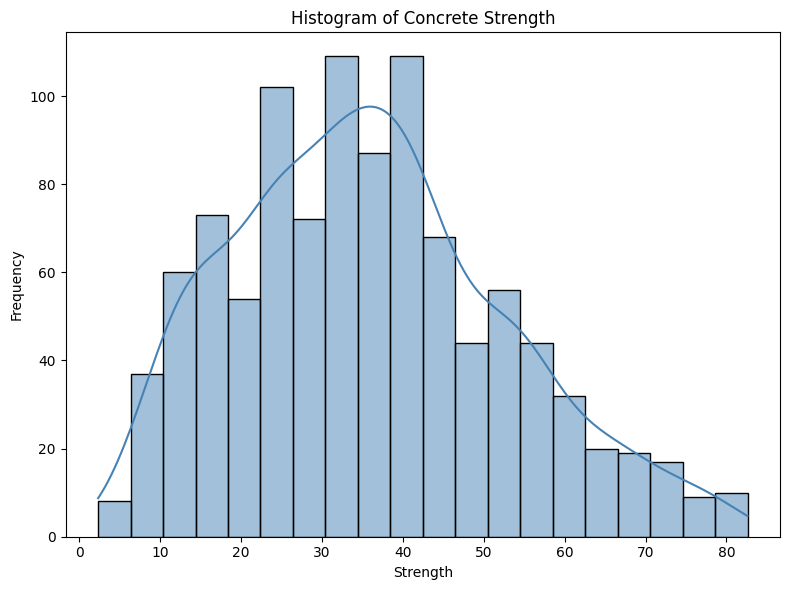

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Strength'], bins=20, kde=True, color='steelblue')
plt.title('Histogram of Concrete Strength')
plt.xlabel('Strength')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

On average, the model's predictions are off by about 11.35 MPa


MSE with PCA-reduced features: 153.3106
MSE with original features: 128.7528
Difference: 24.5578


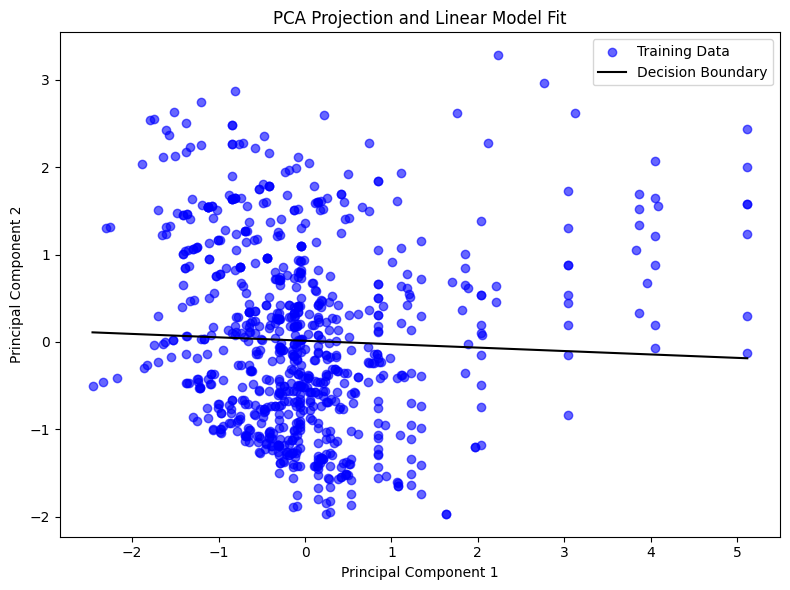

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select features and target
features = ['Water', 'Age', 'Cement']  # Or all features if desired
target = 'Strength'

X = df[features]
y = df[target]

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA (2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Train/test split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

# 5. Train linear regression on PCA components
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# 6. Predict and evaluate
y_pred_pca = model_pca.predict(X_test_pca)
mse_pca = mean_squared_error(y_test, y_pred_pca)
print(f"\nMSE with PCA-reduced features: {mse_pca:.4f}")

# 7. Compare with original model
print(f"MSE with original features: {mse_original:.4f}")
print(f"Difference: {mse_pca - mse_original:.4f}")

# 8. Visualize PCA features and decision boundary
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c='blue', label='Training Data', alpha=0.6)

# Create grid to plot decision boundary
import numpy as np
x_vals = np.linspace(X_train_pca[:, 0].min(), X_train_pca[:, 0].max(), 100)
y_vals = -(model_pca.coef_[0] * x_vals + model_pca.intercept_ - y_train.mean()) / model_pca.coef_[1]
plt.plot(x_vals, y_vals, color='black', label='Decision Boundary')

plt.title("PCA Projection and Linear Model Fit")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
rmse = np.sqrt(mse_pca)
print(f"RMSE PCA: {rmse:.2f}")

RMSE PCA: 12.38
